## Problem Statement:
The project aims to predict restaurant success in Sydney using data science and machine learning techniques using the given 2018 dataset of restaurants in Sydney area. Success is defined by factors like ratings and votes, with the goal of sharing insights and models on a public repository.

## Objectives
1)Utilize data science and machine learning methods to develop predictive models for restaurant success in Sydney based on a dataset from 2018, considering factors like ratings and votes.
2)Deploy the models and findings on a public repository, demonstrating proficiency in feature engineering, modeling, and sharing insights with the wider community.

## Part A 
## 1. Importing and Understanding Data

In [56]:
# loading required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [57]:
data=pd.read_csv("data/zomato_df_final_data.csv")
data.head()    

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

## Q1a) How many unique cuisines are served by Sydney restaurants?
**Counting total number of cuisines served**
**Insights:** 

The code counts the number of cuisines served.
It identifies the total no. of cuisines from number of restaurants and visualizes this information using a bar chart.



1759


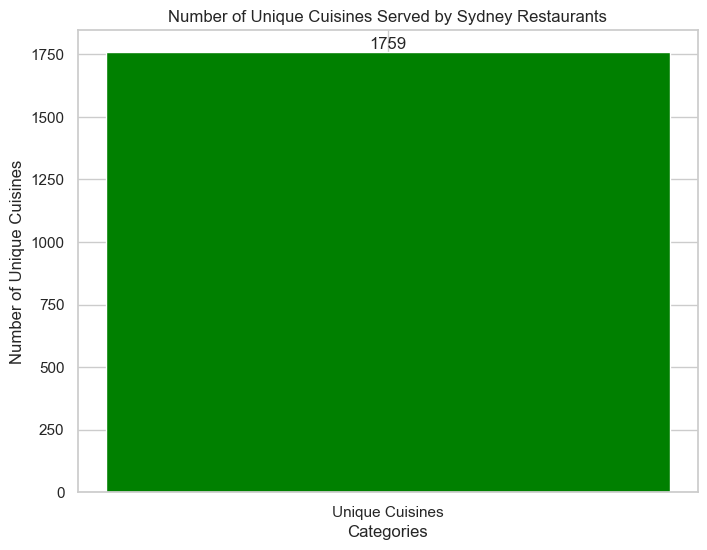

In [58]:
# Count unique cuisines
unique_cuisines = data['cuisine'].explode().nunique()

# Plot a bar chart to show the number of unique cuisines
plt.figure(figsize=(8, 6))
plt.bar('Unique Cuisines', unique_cuisines, color='green')
plt.xlabel('Categories')
plt.ylabel('Number of Unique Cuisines')
plt.title('Number of Unique Cuisines Served by Sydney Restaurants')

# Annotate the bar with the exact count at the center of the graph
plt.text(0, unique_cuisines, str(unique_cuisines), ha='center', va='bottom', fontsize=12)
print (unique_cuisines)
plt.show()

## Q1b) which suburbs (top-3) have the highest number of restaurants?
**Top 3 Suburbs with Highest Number of Restaurants** *
The codes gets the top 3 suburb and identifies the total number of restaurants and visualizes this information using a bar chart.


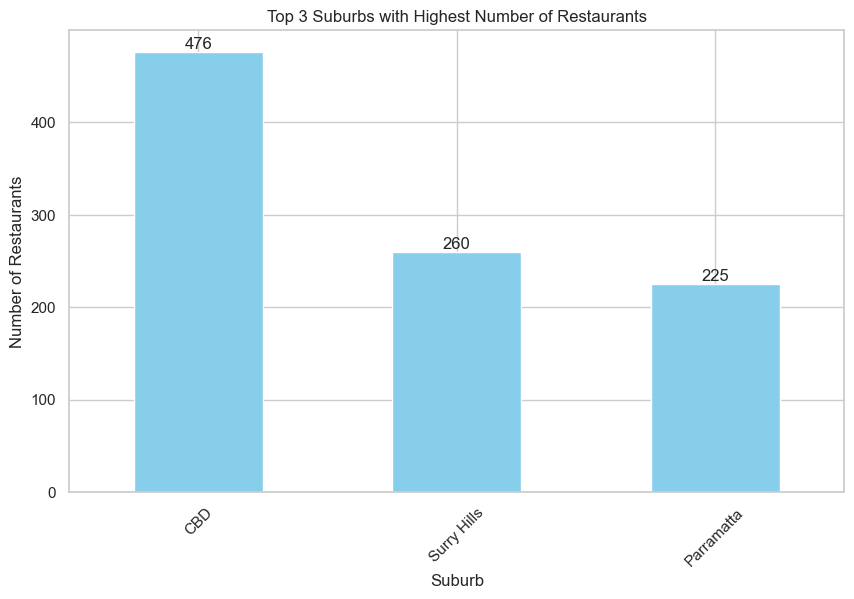

In [59]:
# Count the number of restaurants in each suburb and get the top 3
top_suburbs = data['subzone'].value_counts().head(3)

# Create a bar chart for the top suburbs
plt.figure(figsize=(10, 6))
top_suburbs.plot(kind='bar', color='skyblue')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.title('Top 3 Suburbs with Highest Number of Restaurants')

# Annotate each bar with exact counts
for index, value in enumerate(top_suburbs):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


## Q1c) “Restaurants with ‘excellent’ rating are mostly very expensive while those with  ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals.
Here, first, we have defined cost to corresponding rating text and divided into excellent and poor cost.
And we have plotted Cost vs Number of restuarant from the above 

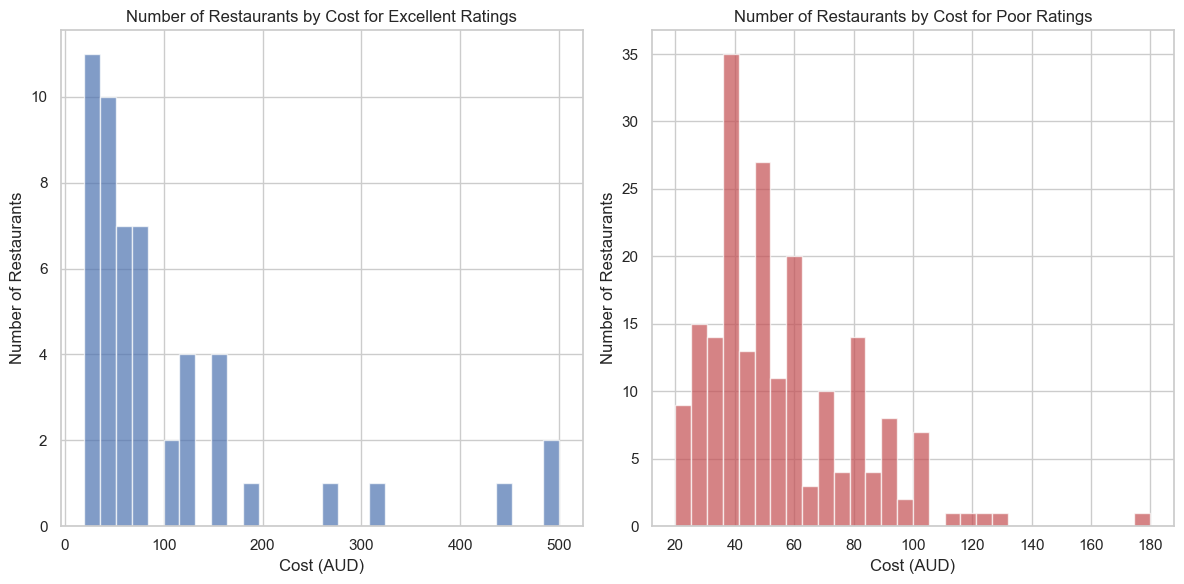

In [60]:
# Filter data for 'Excellent' and 'Poor' ratings
excellent_costs = data[data['rating_text'] == 'Excellent']['cost']
poor_costs = data[data['rating_text'] == 'Poor']['cost']

# Create a double histogram to compare the distribution of costs for Excellent and Poor ratings
plt.figure(figsize=(12, 6))

# Plot histogram for 'Excellent' rating
plt.subplot(1, 2, 1)
plt.hist(excellent_costs, bins=30, alpha=0.7, color='b')
plt.xlabel('Cost (AUD)')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Cost for Excellent Ratings')

# Plot histogram for 'Poor' rating
plt.subplot(1, 2, 2)
plt.hist(poor_costs, bins=30, alpha=0.7, color='r')
plt.xlabel('Cost (AUD)')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Cost for Poor Ratings')

plt.tight_layout()
plt.show()



## In conclusion, 
it can be inferred that the evidence presented supports the stated hypothesis.
Regarding the 'Excellent' rating, it can be stated with accuracy that a substantial proportion of restaurants classified as 'Excellent' tend to exhibit a high level of costliness. Nevertheless, it would be inaccurate to assert that they are predominantly characterized by being exorbitantly priced. There exists a degree of variety, whereby certain restaurants classified as 'Excellent' exhibit comparatively lower costs.

Regarding the categorization of restaurants as 'Poor', it is accurate to assert that such establishments are typically not associated with high costs. The data analysis reveals a distinct clustering of restaurants with a 'Poor' rating in the lower pricing bracket.




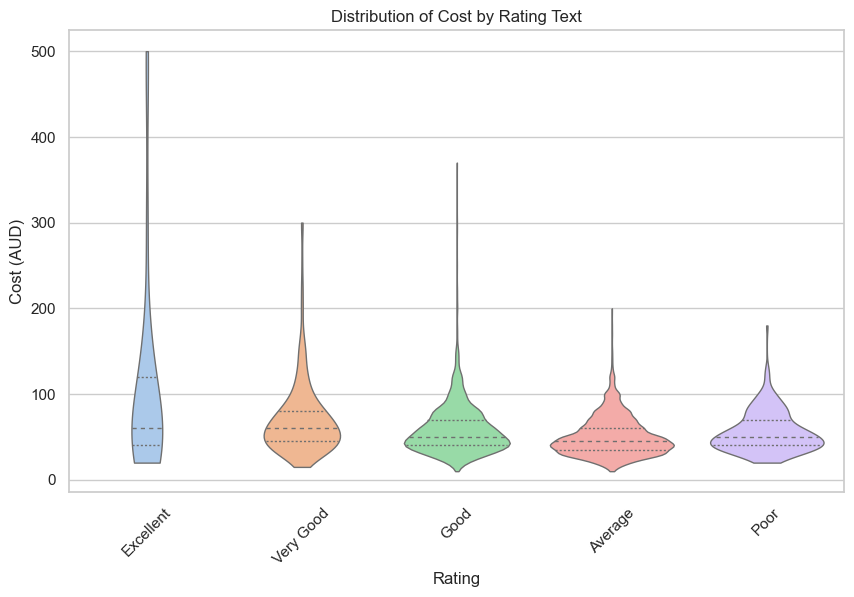

In [61]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create a violin plot to compare the distribution of costs for different rating categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating_text', y='cost', data=data, order=['Excellent', 'Very Good', 'Good', 'Average', 'Poor'],
               palette='pastel', inner='quart', cut=0, linewidth=1, legend=False)  # Assign 'x' variable to 'hue', set legend=False
plt.xlabel('Rating')
plt.ylabel('Cost (AUD)')
plt.title('Distribution of Cost by Rating Text')
plt.xticks(rotation=45)
plt.show()

## 2. Exploratory Analysis
lots.
The resulting visualization consists of three subplots: one for the distribution of costs, one for the distribution of ratings, and one for the number of restaurants by
 type. These visualizations provide insights into the dataset's numerical and categorical variables.


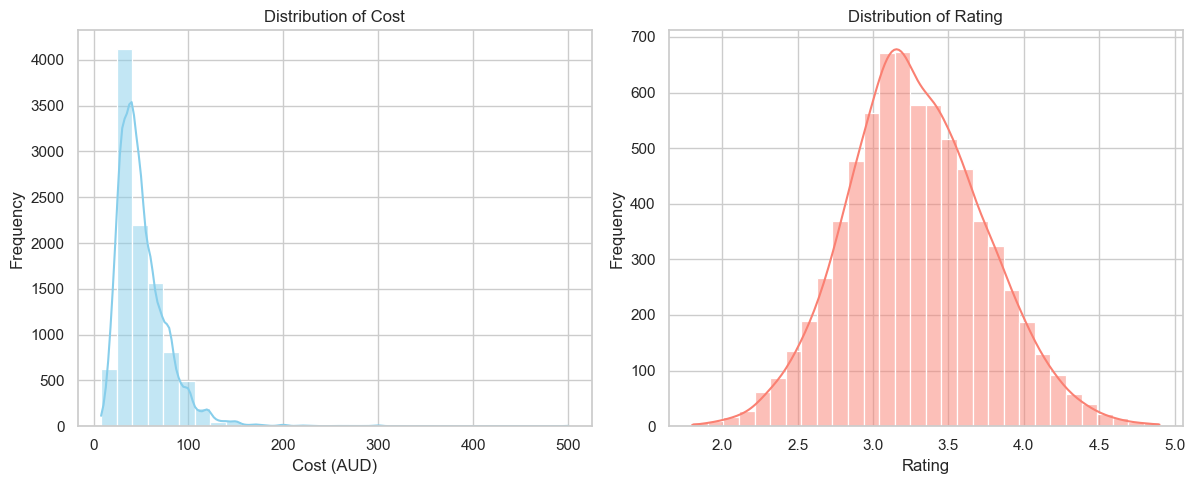

In [62]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create subplots for each variable
plt.figure(figsize=(18, 5))

# Exploratory analysis for 'Cost'
plt.subplot(1, 3, 1)
sns.histplot(data['cost'], bins=30, kde=True, color='skyblue')  # Plot histogram with kernel density estimate
plt.xlabel('Cost (AUD)')
plt.ylabel('Frequency')
plt.title('Distribution of Cost')

# Exploratory analysis for 'Rating'
plt.subplot(1, 3, 2)
sns.histplot(data['rating_number'], bins=30, kde=True, color='salmon')  # Plot histogram with kernel density estimate
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')

plt.tight_layout()
plt.show()

C:\Users\61451\AppData\Local\Temp\ipykernel_9664\3975876990.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


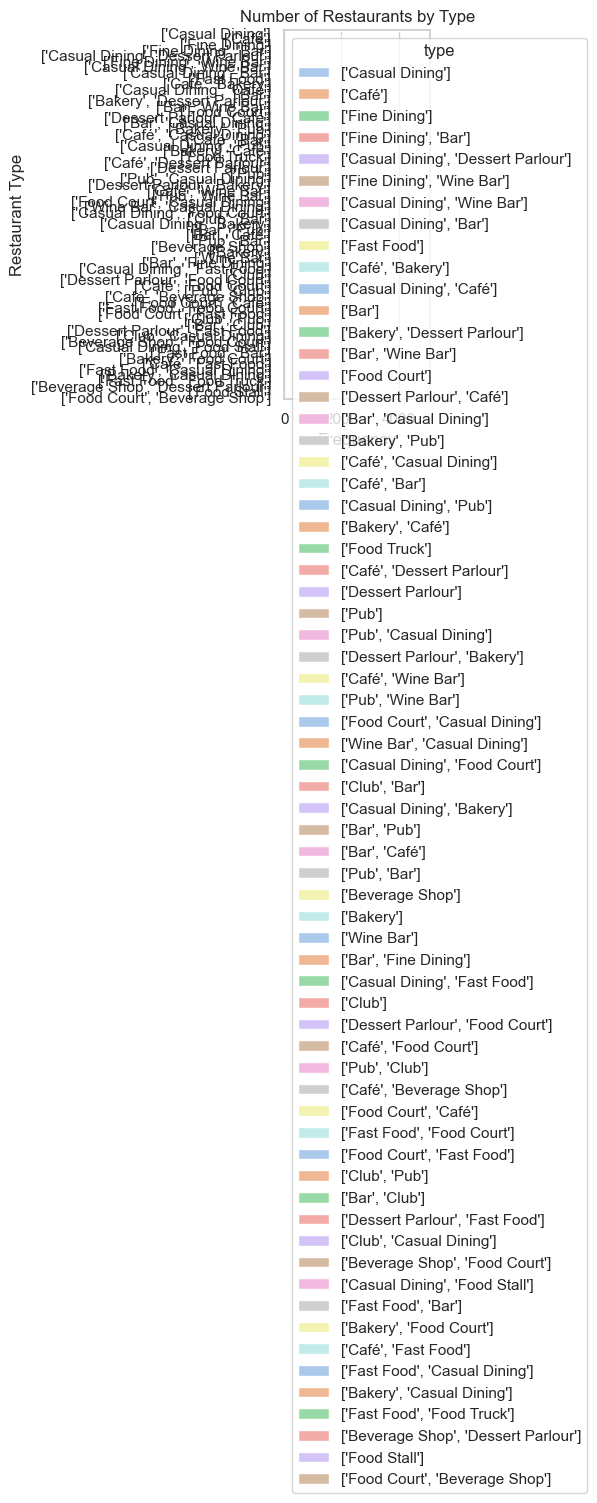

In [63]:
# Exploratory analysis for 'Type'
plt.subplot(1, 3, 3)
sns.countplot(y='type', data=data, hue='type', palette='pastel')  # Count plot for categorical variable 'Type'
plt.xlabel('Frequency')
plt.ylabel('Restaurant Type')
plt.title('Number of Restaurants by Type')

plt.tight_layout()
plt.show()

## 3. Cuisine Density Map:
Here, the necessary libraries are imported. Geopandas (gpd) is used for working with geospatial data, pandas (pd) for data manipulation, Shapely for geometric operations, and Matplotlib (plt) for plotting.

The restaurant data is loaded from a CSV file. Latitude and longitude coordinates are used to create Point geometries. These geometries are then used to create a GeoDataFrame (restaurants_gdf) containing the restaurant data with geometry information.
 
 This line performs a spatial join between the restaurants' GeoDataFrame and the Sydney suburbs GeoDataFrame (sydney_map). It joins the data based on the condition that restaurant points should be within Sydney suburbs polygons. The result is stored in restaurants_with_suburbs.

A function named show_cuisine_densitymap is defined, which takes a cuisine type as an argument (default is 'Indian'). This function will generate a cuisine density map based on the provided cuisine type.


C:\Users\61451\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\61451\AppData\Local\Temp\ipykernel_9664\4054880796.py:16: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  restaurants_with_suburbs = gpd.sjoin(restaurants_gdf, sydney_map, how="inner", op='within')


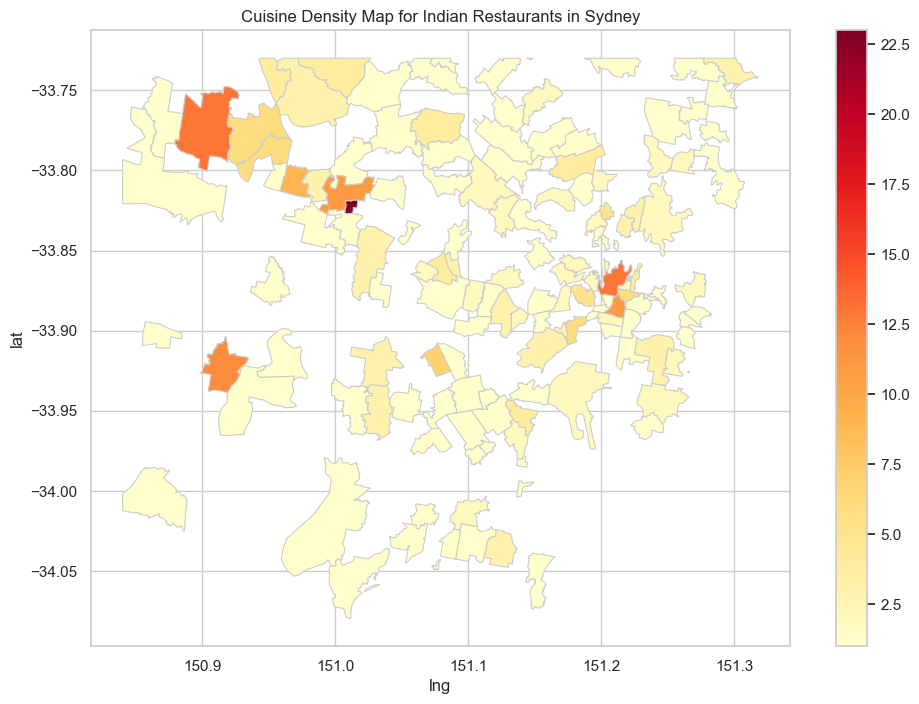

In [64]:
# Load the Sydney geojson file
sydney_map = gpd.read_file("data/sydney.geojson")

# Load the restaurant data
restaurants_df = pd.read_csv("data/zomato_df_final_data.csv")
# Reproject the left geometries to match the CRS of the right geometries

# Perform the spatial join after reprojecting the left geometries

# Create a GeoDataFrame from the restaurant data by converting latitude and longitude to Points
geometry = [Point(lon, lat) for lon, lat in zip(restaurants_df['lng'], restaurants_df['lat'])]
restaurants_gdf = gpd.GeoDataFrame(restaurants_df, geometry=geometry)


# Perform spatial join to join restaurant data with Sydney suburbs
restaurants_with_suburbs = gpd.sjoin(restaurants_gdf, sydney_map, how="inner", op='within')

# Function to show cuisine density map for a specific cuisine
def show_cuisine_densitymap(cuisine='Indian'):
    # Filter restaurants by cuisine
    cuisine_restaurants = restaurants_with_suburbs[restaurants_with_suburbs['cuisine'].str.contains(cuisine, case=False, na=False)]

    # Group by suburb and count the number of restaurants serving the specified cuisine
    cuisine_density = cuisine_restaurants.groupby('SSC_NAME')['cuisine'].count().reset_index()

    # Merge with Sydney map to get a GeoDataFrame with cuisine density information
    cuisine_density_map = sydney_map.merge(cuisine_density, how='left', left_on='SSC_NAME', right_on='SSC_NAME')

    # Plot the cuisine density map
    plt.figure(figsize=(12, 8))
    cuisine_density_map.plot(column='cuisine', cmap='YlOrRd', linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True)
    plt.title(f"Cuisine Density Map for {cuisine} Restaurants in Sydney")
    plt.xlabel("lng")
    plt.ylabel("lat")
    plt.show()

# Example usage
show_cuisine_densitymap(cuisine='Indian')

## Part B – Predictive Modelling
## Feature Engineering:
## 1 Loading and Cleaning the Dataset

In this step, the dataset is loaded into a pandas DataFrame called data. It then removes rows with missing values (NaN) in specific columns specified in the columns_to_clean list.

After cleaning the data, you can use the label_encoder to transform categorical variables into numerical representations. For example, if 'cuisine' is a categorical column, you can encode it as follows:

## 2 Encodings 
The code also includes print statements to check for missing values before and after cleaning. This is a good practice to ensure that the data cleaning steps have been effective in handling missing values.on


In [65]:
# Load your dataset into a pandas DataFrame (assuming the dataset is loaded into a variable called 'data')
# Replace 'data.csv' with your actual file path or data source
data = pd.read_csv('data/zomato_df_final_data.csv')

# 1. Perform data cleaning to remove/impute any records that are useless
# Remove rows with missing values (NaN) in any column
data_cleaned = data.dropna()
print(data_cleaned.columns)

# 2. Use proper label/feature encoding
# Example: Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()

# Load your dataset into a pandas DataFrame
# Replace 'data.csv' with your actual file path or data source
data = pd.read_csv('data/zomato_df_final_data.csv')

# 1. Perform data cleaning to remove/impute any records that are useless
# Remove rows with missing values (NaN) in specific columns
columns_to_clean = ['address', 'cost', 'cuisine', 'lat', 'lng', 'phone', 'rating_number', 'subzone', 'title', 'votes', 'groupon']
data_cleaned = data.dropna(subset=columns_to_clean)

# 2. Use proper label/feature encoding
# Example: Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()

# Encode categorical columns

# Load your dataset into a pandas DataFrame
# Replace 'data.csv' with your actual file path or data source
data = pd.read_csv('data/zomato_df_final_data.csv')

# 1. Perform data cleaning to remove/impute any records that are useless
# Remove rows with missing values (NaN) in specific columns
columns_to_clean = ['address', 'cost', 'cuisine', 'lat', 'lng', 'phone', 'type', 'rating_number', 'subzone', 'title', 'votes', 'groupon']
data_cleaned = data.dropna(subset=columns_to_clean)

# 2. Use proper label/feature encoding
# Example: Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()

data = pd.read_csv("data/zomato_df_final_data.csv")
data_clean = data.dropna()
# Check for missing values in the dataset
print("Missing values before cleaning:")
print(data.isnull().sum())

# Check for missing values after cleaning
print("Missing values after cleaning:")
print(data_cleaned.isnull().sum())

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')
Missing values before cleaning:
address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64
Missing values after cleaning:
address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype:


## II. Regression:
## 3 (model_regression_1) and mean square error

The provided code snippet performs a complete machine learning pipeline for predicting restaurant ratings. It starts by cleaning the dataset, dropping rows with missing values in specific columns. 

Then, it selects numerical features like cost, latitude, longitude, votes, and groupon, as well as categorical features such as address, cuisine, phone, subzone, and title. Categorical variables are one-hot encoded. The target variable, 'rating_number', is extracted. The data is split into training and testing sets (80% training, 20% testing), and a linear regression model is initialized, trained on the training data, and used to make predictions on the test set. 

The mean squared error is calculated to evaluate the model's accuracy, providing a quantitative measure of how well the predictions match the actual ratings.



In [66]:
# Assuming 'data' is your DataFrame containing the dataset

# Data cleaning (handle missing values, categorical variables, etc.)
data_cleaned = data.dropna(subset=['address', 'cost', 'cuisine', 'lat', 'type', 'lng', 'phone', 'link', 'rating_number', 'subzone', 'title', 'votes', 'groupon'])

# Selecting numerical features and target variable
numerical_features = ['cost', 'lat', 'lng', 'votes', 'groupon']
categorical_features = ['address', 'cuisine', 'link', 'phone', 'subzone', 'title']  # Categorical features to be one-hot encoded
target = 'rating_number'

# Extracting numerical features and target variable
X_numerical = data_cleaned[numerical_features]
X_categorical = pd.get_dummies(data_cleaned[categorical_features], drop_first=True)  # One-hot encoding categorical variables
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

# Extracting the target variable (y)
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model_regression_1 = LinearRegression()

# Train the model using the training sets
model_regression_1.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_regression_1.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.14882808246865423


## Linear Regression for above

The provided code snippet generates a scatter plot to visualize the relationship between the actual ratings (y_test) and the predicted ratings (predictions) from the linear regression model from above 



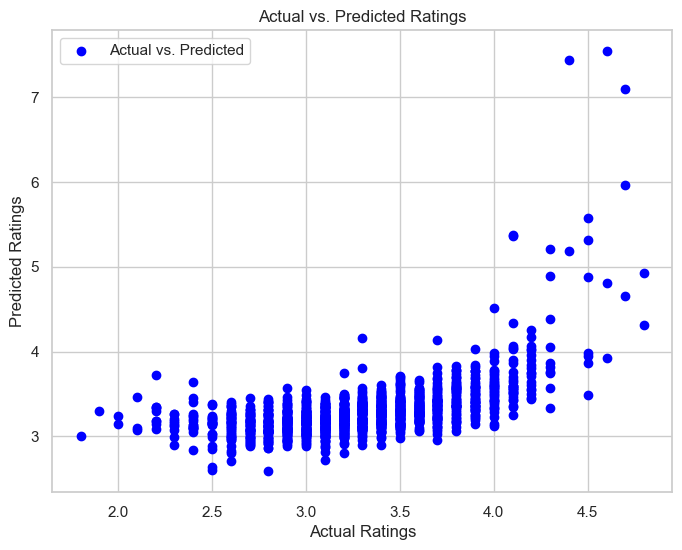

In [67]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()

## 4 (model_regression_2) and mean square error
The following code snippet is using the SGDRegressor class from scikit-learn to train a linear regression model using the stochastic gradient descent optimization algorithm. 

loss='squared_error': This parameter specifies that the loss function for the regression task is mean squared error, denoted as squared_error in scikit-learn.

max_iter=1000: It defines the maximum number of iterations the algorithm will run.
tol=1e-3: It sets the tolerance level. The algorithm will stop when the improvement in the mean squared error between iterations is smaller than this value
.
random_state=0: This parameter ensures reproducibility by fixing the random seed for random number generation

In [68]:
# Initialize the linear regression model with Gradient Descent optimization
model_regression_2 = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=0)

# Train the model using the training sets
model_regression_2.fit(X_train, y_train)

# Make predictions on the test set
predictions_model2 = model_regression_2.predict(X_test)

# Calculate and print the mean squared error for model_regression_2
mse_model2 = mean_squared_error(y_test, predictions_model2)
print('Mean Squared Error (Gradient Descent Model):', mse_model2)

Mean Squared Error (Gradient Descent Model): 1.2789012566556865e+26


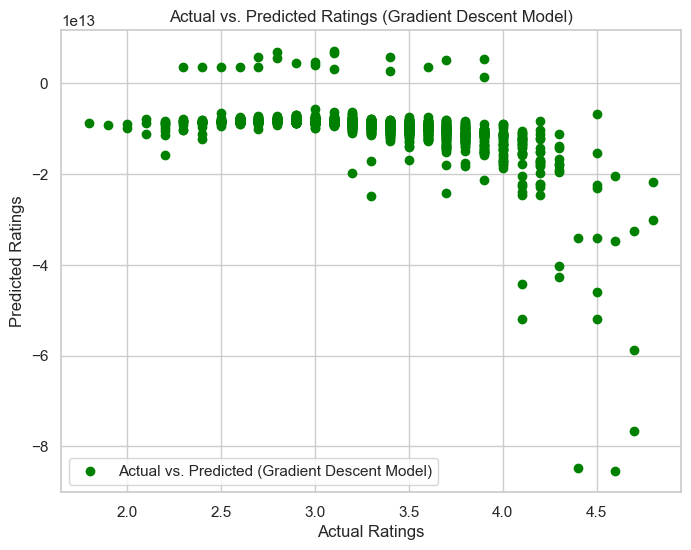

In [69]:
# Plotting the scatter plot for Gradient Descent Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_model2, color='green', label='Actual vs. Predicted (Gradient Descent Model)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings (Gradient Descent Model)')
plt.legend()
plt.grid(True)
plt.show()

## 6 Binary Classifications
Binary Labeling: It maps the 'rating_number' column into binary labels. 'Poor' and 'Average' are assigned the label 0, while 'Good', 'Very Good', and 'Excellent' are assigned the label 1.

Feature Selection and Encoding: It selects numerical features ('cost', 'lat', 'lng', 'votes', 'groupon') and categorical features ('address', 'cuisine', 'link', 'phone', 'subzone', 'title'). Categorical features are one-hot encoded to convert them into numerical format.

Data Splitting: It splits the dataset into training and testing sets (80% training, 20% testing) using train_test_split.

Model Training and Evaluation:

Model 1: It initializes and trains a linear regression model (model_regression_1) using the training data. It then makes predictions on the test set and calculates the mean squared error (MSE) as the evaluation 
metric.
Model 2: It initializes and trains a linear regression model with Gradient Descent optimization (model_regression_2). Similar to Model 1, it makes predictions on the test set and calculates the MSE for evaluation.
Both models are evaluated using MSE, a metric that measures the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.



In [70]:
# Mapping ratings to binary labels: 'Poor' and 'Average' as 0, 'Good', 'Very Good', and 'Excellent' as 1
data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)

# Selecting numerical features and target variable
numerical_features = ['cost', 'lat', 'lng', 'votes', 'groupon']
categorical_features = ['address', 'cuisine', 'link', 'phone', 'subzone', 'title']  # Categorical features to be one-hot encoded
target = 'binary_label'  # Use the binary label as the target variable

# Extracting numerical features and target variable
X_numerical = data_cleaned[numerical_features]
X_categorical = pd.get_dummies(data_cleaned[categorical_features], drop_first=True)  # One-hot encoding categorical variables
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

# Extracting the target variable (y)
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize the linear regression model
model_regression_1 = LinearRegression()

# Train the model using the training sets
model_regression_1.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_regression_1.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error (Model 1):', mse)

# Initialize the linear regression model with Gradient Descent optimization
model_regression_2 = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=0)

# Train the model using the training sets
model_regression_2.fit(X_train, y_train)

# Make predictions on the test set
predictions_model2 = model_regression_2.predict(X_test)

# Calculate and print the mean squared error for model_regression_2
mse_model2 = mean_squared_error(y_test, predictions_model2)
print('Mean Squared Error (Model 2 - Gradient Descent):', mse_model2)

C:\Users\61451\AppData\Local\Temp\ipykernel_9664\2062644933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)


Mean Squared Error (Model 1): 0.1952098665548979
Mean Squared Error (Model 2 - Gradient Descent): 4.768545156376578e+25


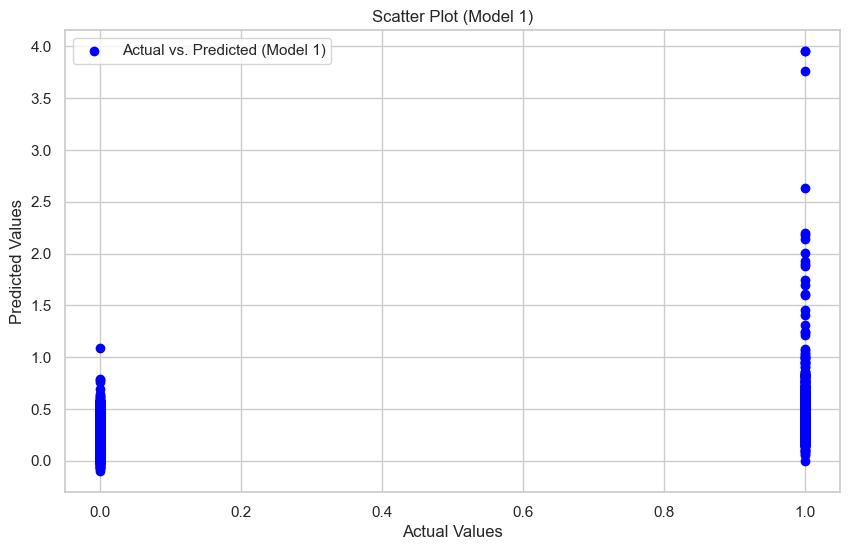

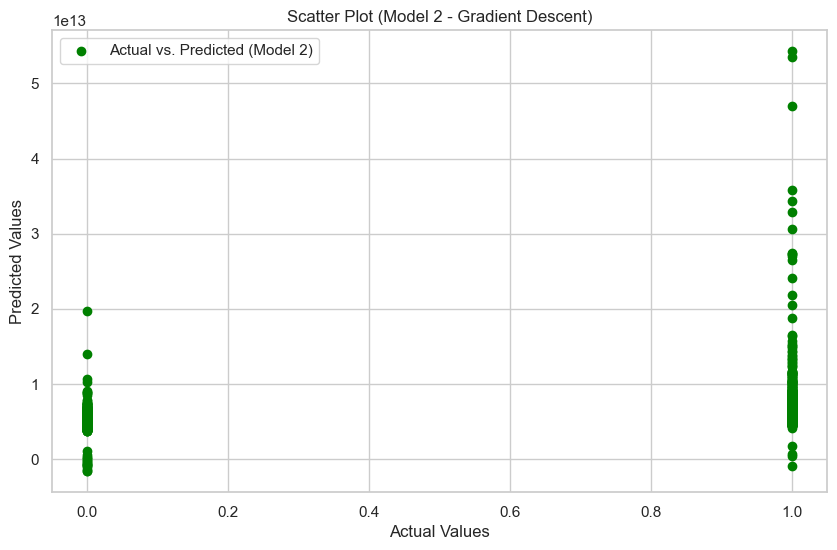

In [71]:
# Assuming you have the actual values in y_test, predictions from Model 1 in predictions, and predictions from Model 2 in predictions_model2

# Scatter plot for Model 1
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted (Model 1)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot (Model 1)')
plt.legend()
plt.show()

# Scatter plot for Model 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_model2, color='green', label='Actual vs. Predicted (Model 2)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot (Model 2 - Gradient Descent)')
plt.legend()
plt.show()

## 7 (model_classification_3)
this code prepares the data for binary classification, splits it into training and testing sets, trains two different linear regression models, and evaluates their performance using mean squared error. However, it's important to note that using linear regression for binary classification is unconventional. Typically, logistic regression or other classification algorithms are used for binary classification tasks.

In [72]:
# Binary Labeling
data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)

# Feature Selection and Encoding
numerical_features = ['cost', 'lat', 'lng', 'votes', 'groupon']
categorical_features = ['address', 'cuisine', 'link', 'phone', 'subzone', 'title']
X_numerical = data_cleaned[numerical_features]
X_categorical = pd.get_dummies(data_cleaned[categorical_features], drop_first=True)
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

# Target Variable
y = data_cleaned['binary_label']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Model 1 - Linear Regression
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)
predictions_1 = model_regression_1.predict(X_test)
mse_1 = mean_squared_error(y_test, predictions_1)
print('Mean Squared Error (Model 1):', mse_1)

# Model 2 - Linear Regression with Gradient Descent Optimization
model_regression_2 = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=0)
model_regression_2.fit(X_train, y_train)
predictions_2 = model_regression_2.predict(X_test)
mse_2 = mean_squared_error(y_test, predictions_2)
print('Mean Squared Error (Model 2 - Gradient Descent):', mse_2)# Binary Labeling
data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 2)

# Feature Selection and Encoding
numerical_features = ['cost', 'lat', 'lng', 'votes', 'groupon']
categorical_features = ['address', 'cuisine', 'link', 'phone', 'subzone', 'title']
X_numerical = data_cleaned[numerical_features]
X_categorical = pd.get_dummies(data_cleaned[categorical_features], drop_first=True)
X_encoded = pd.concat([X_numerical, X_categorical], axis=1)

# Target Variable
y = data_cleaned['binary_label']

# Data Splitting (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Logistic Regression Model
model_classification_3 = LogisticRegression(random_state=0)

# Train the model using the training data
model_classification_3.fit(X_train, y_train)

# Predictions on the test set
predictions_3 = model_classification_3.predict(X_test)
predictions_model2 = model_regression_2.predict(X_test)

# Evaluate the model
accuracy = model_classification_3.score(X_test, y_test)
print('Accuracy (Model 3 - Logistic Regression):', accuracy)

C:\Users\61451\AppData\Local\Temp\ipykernel_9664\1025817470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 1)


Mean Squared Error (Model 1): 0.1952098665548979
Mean Squared Error (Model 2 - Gradient Descent): 4.768545156376578e+25


C:\Users\61451\AppData\Local\Temp\ipykernel_9664\1025817470.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['binary_label'] = data_cleaned['rating_text'].apply(lambda x: 0 if x in ['Poor', 'Average'] else 2)
C:\Users\61451\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Model 3 - Logistic Regression): 0.8338129496402877


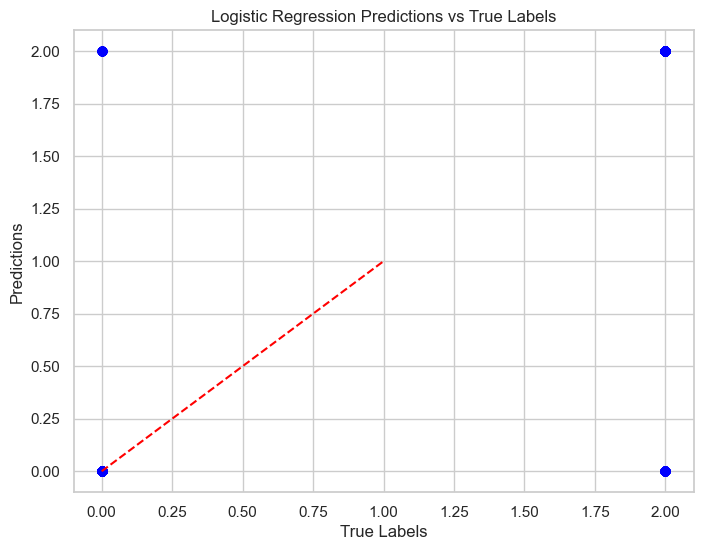

In [73]:
# Scatter plot for Logistic Regression Predictions vs True Labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_3, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('Logistic Regression Predictions vs True Labels')
plt.show()

## 8 Confusion Matrix
This code is for evaluating the performance of the trained logistic regression model (model_classification_3) using a confusion matrix and visualizing the results using a heatmap.

The trained logistic regression model (model_classification_3) is used to predict the target variable on the test dataset (X_test). These predictions will be used for evaluating the model's performance.

In [74]:
# Assuming your simplified data is stored in X_encoded (features) and y (target binary labels)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Initialize the logistic regression model for binary classification
model_classification_3 = LogisticRegression(random_state=0)

# Train the model using the training sets
model_classification_3.fit(X_train, y_train)
print('Accuracy (Model 3 - Logistic Regression):', accuracy)
# Now, model_classification_3 is trained and can be used for predictions on the test data

Accuracy (Model 3 - Logistic Regression): 0.8338129496402877


C:\Users\61451\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Use the trained logistic regression model to make predictions on the test set
predictions_logistic_3 = model_classification_3.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_logistic_3)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2'], 
            yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[844  68]
 [163 315]]


## 9 Conclusion
Linear Regression Models:

Linear regression models have been attempted but might not be suitable for this binary classification task, as they predict continuous values and are being evaluated using MS

The logistic regression model seems to be the primary focus, given the detailed evaluation and accuracy measurement.

Linear regression models are more appropriate for regression tasks where the target variable is continuous. For classification tasks, logistic regression or other classification algorithms are generally more suitable.

the effectiveness of a model heavily depends on the nature of the data and the problem domain. Therefore, it's essential to experiment, iterate, and continuously evaluate different models and techniques to achieve the best results for your specific use case.E.
